<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

_Author: Unknown_

------

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [3]:
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# Create dataframe from cali data
cali_df = pd.DataFrame(X, columns=cali.feature_names)
cali_df['price'] = y

In [5]:
# Check result
print(cali_df.shape)
cali_df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


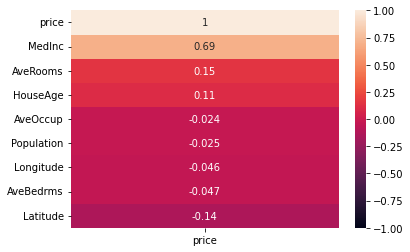

In [6]:
# Check correlation
sns.heatmap(cali_df.corr()[['price']]\
            .sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True);

### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [7]:
# Split X, y
X = cali_df.drop(columns=['price', 'Longitude', 'Latitude'])
y = cali_df['price']

# Split train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Normalize Xs
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [8]:
X_train.shape

(15480, 6)

In [9]:
model = Sequential()

model.add(Dense(24, activation='relu', input_shape=(X_train_sc.shape[1],)))

model.add(Dense(1, activation=None))

Set up the compilation of the network.  Use an `adam` optimizer and appropriate loss function with the mean squared error metric.

In [10]:
model.compile(loss='mse', optimizer='adam')

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [11]:
history = model.fit(X_train_sc, y_train,
                    epochs=100,
                    batch_size= 256,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

In [12]:
# Predict
y_preds = model.predict(X_test_sc)[:, 0]

162/162 [==============================] - 0s 959us/step


In [13]:
# R^2 for test set
metrics.r2_score(y_test, y_preds)

0.6589315709646011

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

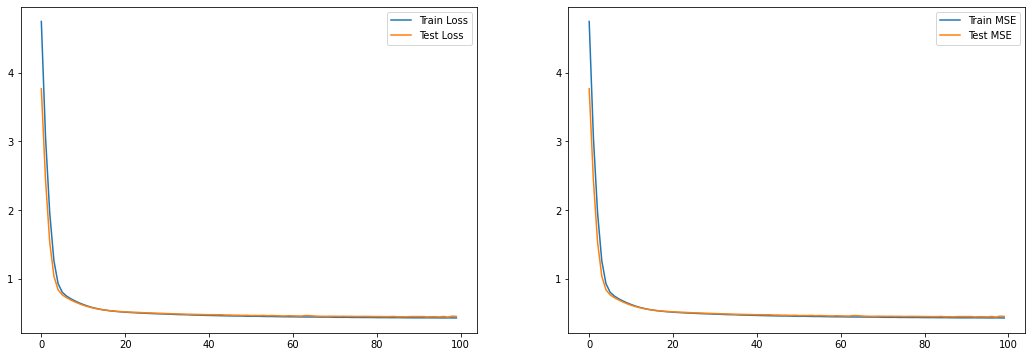

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Test Loss')
axs[0].legend()
axs[1].plot(history.history['loss'], label='Train MSE')
axs[1].plot(history.history['val_loss'], label='Test MSE')
axs[1].legend();

# Due to loss fuction and mean squared error are the same thing, we plot the same lines.

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `ReLU` activation function.

In [15]:
# Split X, y
X = cali_df.drop(columns=['price'])
y = cali_df['price']

# Split train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Normalize Xs
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [16]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation=None))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                576       
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mse', optimizer='adam')

In [19]:
history = model.fit(X_train_sc, y_train,
                    epochs=100,
                    batch_size= 256,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

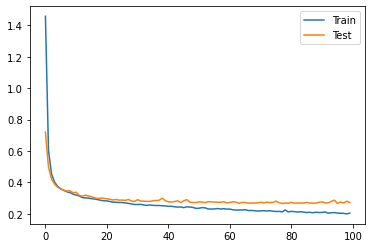

In [20]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend();

In [21]:
# Predict
y_preds = model.predict(X_test_sc)[:, 0]

# R^2 for test set
metrics.r2_score(y_test, y_preds)

162/162 [==============================] - 0s 815us/step


0.7946385116229513

In [22]:
# After adding complexity of the model, MSE decreased and R^2 increased. 

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

##### Does this change anything?

162/162 [==============================] - 0s 857us/step
Test R2: 0.7929965574137818


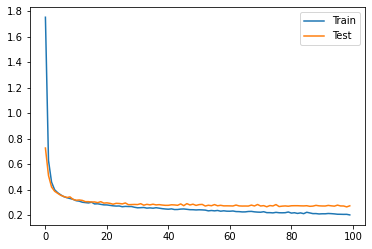

In [23]:
# Topology
model = Sequential()

BatchNormalization()
model.add(Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation=None))

# Compile
model.compile(loss='mse', optimizer='adam')

# Fit
history = model.fit(X_train_sc, y_train,
                    epochs=100,
                    batch_size= 256,
                    validation_data=(X_test_sc, y_test),
                    verbose=0)

# Evaluate

# Predict
y_preds = model.predict(X_test_sc)[:, 0]

print(f"Test R2: {metrics.r2_score(y_test, y_preds)}")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend();

In [24]:
# No change in adding BatchNormalization

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [25]:
# Set patience of EarlyStopping
es = EarlyStopping(patience=5)

162/162 [==============================] - 0s 837us/step
Test R2: 0.7921081248090979


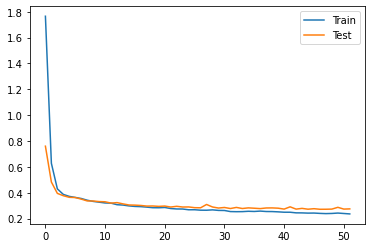

In [26]:
# Topology
model = Sequential()

BatchNormalization()
model.add(Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation=None))

# Compile
model.compile(loss='mse', optimizer='adam')

# Fit
history = model.fit(X_train_sc, y_train,
                    epochs=100,
                    batch_size= 256,
                    validation_data=(X_test_sc, y_test),
                    callbacks=[es],
                    verbose=0)

# Evaluate

# Predict
y_preds = model.predict(X_test_sc)[:, 0]

print(f"Test R2: {metrics.r2_score(y_test, y_preds)}")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend();

In [27]:
# About 30 epochs is appropriate.

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

162/162 [==============================] - 0s 863us/step
Test R2: 0.7879620362243951


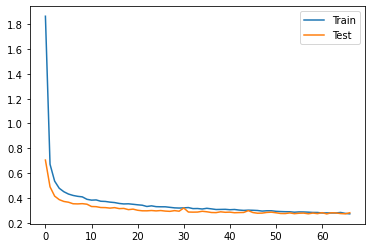

In [28]:
# Topology
model = Sequential()

BatchNormalization()
model.add(Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation=None))

# Compile
model.compile(loss='mse', optimizer='adam')

# Fit
history = model.fit(X_train_sc, y_train,
                    epochs=100,
                    batch_size= 256,
                    validation_data=(X_test_sc, y_test),
                    callbacks=[es],
                    verbose=0)

# Evaluate

# Predict
y_preds = model.predict(X_test_sc)[:, 0]

print(f"Test R2: {metrics.r2_score(y_test, y_preds)}")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend();

In [29]:
# Model ran more epochs after adding dropout

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [30]:
# Craete baseline RMSE
y_baseline_preds = np.repeat(y_train.mean(), y_preds.shape[0])
print('Baseline RMSE:',
      metrics.mean_squared_error(y_test, y_baseline_preds, squared=False).round(2))

# NNs RMSE
y_preds = model.predict(X_test_sc, verbose=0)[:, 0]
print('NNs RMSE:',
      metrics.mean_squared_error(y_test, y_preds, squared=False).round(2))

# The NNs model beat baseline score.

Baseline RMSE: 1.15
NNs RMSE: 0.53


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

162/162 [==============================] - 0s 829us/step
Test R2: 0.7521869380199296


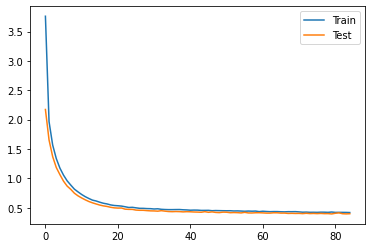

In [31]:
# Topology
model = Sequential()

BatchNormalization()
model.add(Dense(64, activation='relu', 
                input_shape=(X_train_sc.shape[1],),
                kernel_regularizer=l2(0.01)
               ))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))

model.add(Dense(1, activation=None))

# Compile
model.compile(loss='mse', optimizer='adam')

# Fit
history = model.fit(X_train_sc, y_train,
                    epochs=100,
                    batch_size= 256,
                    validation_data=(X_test_sc, y_test),
                    callbacks=[es],
                    verbose=0)

# Evaluate

# Predict
y_preds = model.predict(X_test_sc)[:, 0]

print(f"Test R2: {metrics.r2_score(y_test, y_preds)}")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend();

In [32]:
# Craete baseline RMSE
y_baseline_preds = np.repeat(y_train.mean(), y_preds.shape[0])
print('Baseline RMSE:',
      metrics.mean_squared_error(y_test, y_baseline_preds, squared=False).round(2))

# NNs RMSE
y_preds = model.predict(X_test_sc, verbose=0)[:, 0]
print('NNs RMSE:',
      metrics.mean_squared_error(y_test, y_preds, squared=False).round(2))

# The NNs model beat baseline score.

Baseline RMSE: 1.15
NNs RMSE: 0.57


In [33]:
# The model still beats baseline score and loss function line 
# of test set is smoother than without l2 regularization.

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [34]:
model.save('./cali_housing.h5')